<a href="https://colab.research.google.com/github/dtabuena/Images/blob/main/PlayWithImages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import skimage
import numpy as np
from  matplotlib import pyplot as plt

In [6]:
def rgb_cmy(image,caxis=2,balance = [1,1,1]):

    image = np.moveaxis(image, caxis, 2)

    image_R = image[:,:,0]
    image_G = image[:,:,1]
    image_B = image[:,:,2]


    CYM_r = np.zeros_like(image)
    CYM_r[:,:,0] = image_R
    CYM_r[:,:,2] = image_R

    CYM_g = np.zeros_like(image)
    CYM_g[:,:,0] = image_G
    CYM_g[:,:,1] = image_G

    CYM_b = np.zeros_like(image)
    CYM_b[:,:,1] = image_B
    CYM_b[:,:,2] = image_B

    merge_cym = CYM_r*balance[0] + CYM_g*balance[1] + CYM_b*balance[2]
    merge_cym = merge_cym/np.max(merge_cym)
    return merge_cym

In [3]:
!wget 'https://www.dropbox.com/s/ipc4m5lrs0l7iml/2022x08x17_RNF182_E4KI_F_P256_s002_c006_CA3xPOS_MMStack_Default.ome.tif'
filename = '/content/2022x08x17_RNF182_E4KI_F_P256_s002_c006_CA3xPOS_MMStack_Default.ome.tif'


import skimage.io as skio
imstack1 = skio.imread(filename, plugin="tifffile")




--2022-09-20 00:08:13--  https://www.dropbox.com/s/ipc4m5lrs0l7iml/2022x08x17_RNF182_E4KI_F_P256_s002_c006_CA3xPOS_MMStack_Default.ome.tif
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/ipc4m5lrs0l7iml/2022x08x17_RNF182_E4KI_F_P256_s002_c006_CA3xPOS_MMStack_Default.ome.tif [following]
--2022-09-20 00:08:13--  https://www.dropbox.com/s/raw/ipc4m5lrs0l7iml/2022x08x17_RNF182_E4KI_F_P256_s002_c006_CA3xPOS_MMStack_Default.ome.tif
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc02552820e4be76fd1103432ae8.dl.dropboxusercontent.com/cd/0/inline/BtSSP6lAM6edyAgnWhMlhjmeCJyexvnBwlAjyYdKX0EXCtNF1umICX7tYDTQrpH8m243RWP9FVtpqIrtWAFxHqjU8ByFTQ_-QooEu6TxsmHOviM-eirr2-wGAlehhVvV7hWEpHtRUm-Uv0sDpcdSoyJ1DKNG3c64p3JIyQbbx7qtcw/file# [following]
--2

[[5.99916131e-04]
 [7.57274379e-05]]


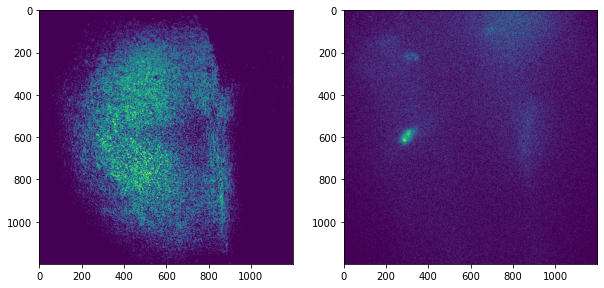

In [4]:
import skimage.filters as skfilt
from skimage import filters


imstack1.shape
num_z = imstack1.shape[0]
z_dims =  range(num_z)
thresh_val = np.ones([num_z,1])*np.nan
fig, axs = plt.subplots(1,num_z, figsize=np.array([num_z,1])*5)
for zi in z_dims:
    edge_im =  filters.sobel( imstack1[zi,:,:] ) 
    # axs[zi].imshow(  ) 
    thresh_val[zi] = skfilt.threshold_otsu(edge_im)
    mask = edge_im>thresh_val[zi]*1
    axs[zi].imshow(imstack1[zi,:,:]*mask)
print(thresh_val)

##




DIC_image (1200, 1200)
Merge (1200, 1200, 3)


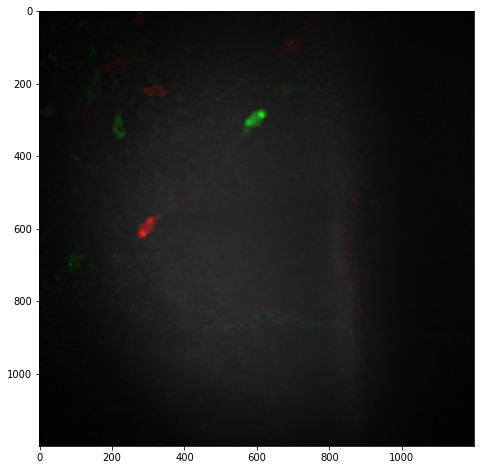

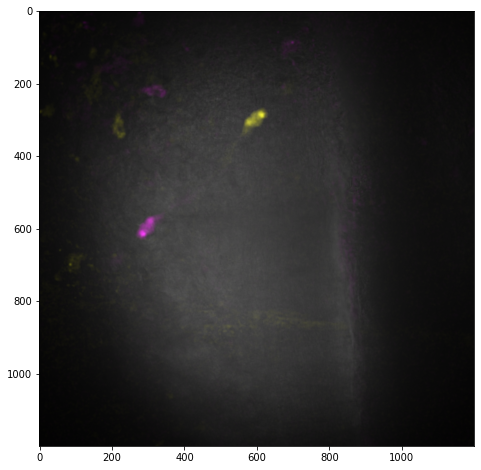

In [10]:
DIC_image =  imstack1[0,:,:] 
Red_image =  imstack1[1,:,:]  
print('DIC_image',DIC_image.shape)
Merge = np.repeat( np.expand_dims(DIC_image,2),3,2)
Merge = Merge/np.max(Merge)*.2
print('Merge',Merge.shape)

Red_image = skimage.filters.difference_of_gaussians(Red_image,low_sigma=2 ,high_sigma=20)
Red_image[Red_image<0] = 0
Red_image = Red_image/(np.max(Red_image))
rem = 1 - Merge[:,:,0]
to_add = rem*Red_image

Merge[:,:,0] = Merge[:,:,0]+to_add
Merge[:,:,1] = Merge[:,:,1]+to_add.T
merge_cym = rgb_cmy(Merge)
plt.imshow(Merge)
fig = plt.gcf()
size = 8
fig.set_figheight(size)
fig.set_figwidth(size)
plt.show()
plt.imshow(merge_cym)
fig = plt.gcf()
size = 8
fig.set_figheight(size)
fig.set_figwidth(size)



plt.show()

In [ ]:
merge_cym = rgb_cmy(Merge)
plt.imshow(merge_cym)
fig = plt.gcf()
size = 8
fig.set_figheight(size)
fig.set_figwidth(size)


In [ ]:
MergeMYC = np.zeros_like(Merge)


Merge_R = Merge[:,:,0]
Merge_G = Merge[:,:,1]
Merge_B = Merge[:,:,2]

MergeMYC_R = np.zeros_like(Merge)
MergeMYC_R[:,:,0] = Merge_R
MergeMYC_R[:,:,2] = Merge_R

MergeMYC_G = np.zeros_like(Merge)
MergeMYC_G[:,:,0] = Merge_G
MergeMYC_G[:,:,1] = Merge_G

MergeMYC_B = np.zeros_like(Merge)
MergeMYC_B[:,:,1] = Merge_B
MergeMYC_B[:,:,2] = Merge_B


MergeMYC = MergeMYC_R+MergeMYC_G+MergeMYC_B
MergeMYC = MergeMYC/np.max(MergeMYC)
plt.imshow(MergeMYC)
plt.show()
plt.imshow(Merge)
plt.show()